<a href="https://colab.research.google.com/github/kykim818/AI/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install https://github.com/OlafenwaMoses/ImageAI/releases/download/2.0.2/imageai-2.0.2-py3-none-any.whl

# 라이브러리이용을 위해 버전 다운그레이드 
!pip install tensorflow==1.4

In [1]:
#Colab에서 진행시 구글드라이브 연동
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:


from io import open
import requests
import shutil
from zipfile import ZipFile
import os
from imageai.Prediction.Custom import ModelTraining
# 데이터셋이 들어있는 경로 표시
DATASET_DIR = '/content/gdrive/My Drive/Colab Notebooks/fishdata'

model_trainer = ModelTraining()
# As 뒤에ResNet을 이용함을 명시함
model_trainer.setModelTypeAsResNet()
model_trainer.setDataDirectory(DATASET_DIR)
model_trainer.trainModel(
  #num_objects : 분류할 클래스 개수 , num_experiments :   Epoch의 횟수 
   num_objects=4, num_experiments=50, enhance_data=True, 
   batch_size=15, show_network_summary=True)

In [ ]:
from imageai.Prediction.Custom import CustomImagePrediction
import os
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
execution_path = os.getcwd() + '/gdrive/My Drive/Colab Notebooks/custom_prediction/'
print(execution_path)

Populating the interactive namespace from numpy and matplotlib


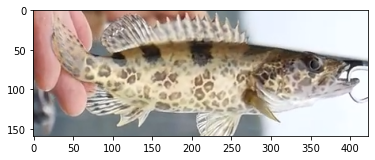

Sogari : 49.77310597896576
Bassfish : 49.44718778133392
Rockfish : 0.6055749021470547
Redsnapper : 0.17414187313988805


In [6]:
from imageai.Prediction.Custom import CustomImagePrediction
import os
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#경로 설정
execution_path = os.getcwd() + '/gdrive/My Drive/Colab Notebooks/custom_prediction/'


prediction = CustomImagePrediction()
prediction.setModelTypeAsResNet()
#모델과 클래스 설정 
prediction.setModelPath(
   os.path.join(execution_path, "model_ex-100_acc-0.800000.h5"))
prediction.setJsonPath(
   os.path.join(execution_path, "model_class.json"))
prediction.loadModel(num_objects=4)
file='sogari_test1.PNG'
predictions, probabilities = prediction.predictImage(
   os.path.join(execution_path, file), result_count=4)
img=mpimg.imread(
   os.path.join(execution_path, file))
imgplot = plt.imshow(img)
plt.show()
for eachPrediction, eachProbability in zip(predictions, probabilities):
    print(eachPrediction + " : " + eachProbability)